In [0]:
pip install Pillow

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-12662451-70a5-418e-8970-42b1e5bf753d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
## Importamos las librerías necesarias
import numpy as np

from pyspark.sql import functions as F

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.offsetbox import AnnotationBbox, TextArea, HPacker, VPacker
from PIL import Image

In [0]:
#values = spark.read.csv("/FileStore/df/VALUES.csv" , inferSchema = True, header = False , sep="," , encoding="ISO-8859-1")
#params= spark.read.csv("/FileStore/df/PARAMS.csv" , inferSchema = True, header = False , sep="," , encoding="ISO-8859-1")
#ranges= spark.read.csv("/FileStore/df/RANGES.csv" , inferSchema = True, header = False , sep="," , encoding="ISO-8859-1")
searchNuevoBusquets = spark.read.csv("/FileStore/df/SEARCH_PLAYER_CC.csv" , inferSchema = True, header = True , sep=",")
df_sin_normalizar=spark.read.csv("/FileStore/df/SEARCH_PLAYER_CC_SIN_NORMALIZAR.csv" , inferSchema = True, header = True , sep=",")
df_sin_normalizarOrdenado=df_sin_normalizar.sort(F.desc('IndiceInfluencia'))
#df_sin_normalizarOrdenado.display()

In [0]:
#recuperamos minimos y maximos
#creamos una funcion de usuario que nos va a devolver una diccionario con el minimo y maximo de cada columna en forma de tupla.
def min_and_max_by_attribute(df):
  stadistics = dict()
  for c in df.columns[1:]:
    Tipo=dict(df.dtypes)[c]
    if(Tipo!='string'):
        stadistics[c] = (df.agg({c:'min'}).collect()[0][0], df.agg({c:'max'}).collect()[0][0])
  #print(stadistics)
  return stadistics

#La normalizacion de los datos (min y max) se hará partiendo de jugadores cuya posicion principal sea Centrocampistas (CC), recogido anteriormente en el dataframe: searchNuevoBusquetsCopia
min_and_max = min_and_max_by_attribute(df_sin_normalizarOrdenado)

In [0]:
limiteMinMax=min_and_max
limiteMinMax

Out[10]: {'NumToques90': (55.723, 96.519),
 'AccOfenXA90': (0.97, 2.01),
 'DistProgBlnAtaq90': (68.679, 248.457),
 'DistTotPas90': (748.857, 1451.048),
 'PasesInt90': (46.936, 86.369),
 'PasesCmpTot%': (75.4, 89.7),
 'PasesCmpCort%': (83.9, 92.6),
 'PaseCmpBajoPres%': (0.8, 0.93),
 'PresionCnExito%': (27.4, 40.6),
 'PasIntercyBloq90': (0.771, 2.204),
 'PaseRecibido%': (88.7, 97.5),
 'IntercyRecup90': (4.021, 6.842),
 'DuelsAereoGan%': (22.2, 67.6),
 'TklDerriboGan%': (0.48, 0.76),
 'Dribles%': (40.85, 77.25),
 'IndiceInfluencia': (7216.52, 11365.42)}

In [0]:
#params = ['xAssist', 'Key Passes', 'Crosses Into Box', 'Cross Completion %', 'Deep Completions',
#          'Progressive Passes', 'Prog. Pass Accuracy', 'Dribbles', 'Progressive Runs',
#          'PADJ Interceptions', 'Succ. Def. Actions', 'Def Duel Win %']
#Obtenemos los parámetros para 'params'
dfGraficoRadar=df_sin_normalizarOrdenado
dfGraficoRadar=dfGraficoRadar.drop('Jugador','IndiceInfluencia')
paramsss=dfGraficoRadar.columns
paramsss

Out[11]: ['NumToques90',
 'AccOfenXA90',
 'DistProgBlnAtaq90',
 'DistTotPas90',
 'PasesInt90',
 'PasesCmpTot%',
 'PasesCmpCort%',
 'PaseCmpBajoPres%',
 'PresionCnExito%',
 'PasIntercyBloq90',
 'PaseRecibido%',
 'IntercyRecup90',
 'DuelsAereoGan%',
 'TklDerriboGan%',
 'Dribles%']

In [0]:
#ranges = [(0.0, 0.15), (0.0, 0.67), (0.06, 6.3), (19.51, 50.0), (0.35, 1.61),(6.45, 11.94), (62.9, 79.4), (0.43, 4.08), (0.6, 2.33),(4.74, 7.2), (8.59, #12.48), (50.66, 66.67)]
rangesss=list(limiteMinMax.values())
rangesss

Out[12]: [(55.723, 96.519),
 (0.97, 2.01),
 (68.679, 248.457),
 (748.857, 1451.048),
 (46.936, 86.369),
 (75.4, 89.7),
 (83.9, 92.6),
 (0.8, 0.93),
 (27.4, 40.6),
 (0.771, 2.204),
 (88.7, 97.5),
 (4.021, 6.842),
 (22.2, 67.6),
 (0.48, 0.76),
 (40.85, 77.25),
 (7216.52, 11365.42)]

In [0]:
dfGraficoRadar.display()

NumToques90 AccOfenXA90 DistProgBlnAtaq90 DistTotPas90 PasesInt90 PasesCmpTot% PasesCmpCort% PaseCmpBajoPres% PresionCnExito% PasIntercyBloq90 PaseRecibido% IntercyRecup90 DuelsAereoGan% TklDerriboGan% Dribles% 96.519 2.01 248.457 1451.048 86.369 84.2 92.4 0.89 34.1 2.039 93.2 6.842 53.3 0.76 44.3 87.692 1.15 180.187 1378.781 79.007 86.9 90.5 0.9 38.7 1.46 97.5 5.726 46.2 0.67 77.25 66.75 1.53 162.75 1104.25 58.25 81.1 86.3 0.8 35.7 1.333 94.8 6.25 58.3 0.71 70.0 74.202 1.73 137.46 1095.78 63.175 87.0 92.6 0.87 28.1 0.995 94.1 4.021 40.0 0.67 40.85 66.186 0.97 116.52 916.271 54.692 86.7 92.6 0.87 40.6 1.003 93.7 6.634 67.6 0.53 67.3 67.696 1.38 153.397 930.11 56.385 75.4 83.9 0.93 35.5 2.204 90.8 5.614 26.7 0.67 58.95 68.122 1.34 136.635 821.807 54.868 80.0 86.5 0.84 34.6 1.888 90.6 5.772 56.3 0.73 47.9 55.723 1.28 78.767 810.019 46.936 89.0 92.3 0.9 30.0 0.771 89.0 5.01 39.3 0.48 59.25 60.357 1.51 68.679 748.857 48.5 89.7 91.4 0.93 27.4 1.143 88.7 4.25 22.2 0.62 43.7

In [0]:
### parameter value
#values = [
#    [0.11, 0.53, 0.70, 27.66, 1.05, 6.84, 84.62, 4.56, 2.22, 5.93, 8.88, 64.29],   ## for Sergino Dest
#    [0.07, 0.36, 0.16, 32.14, 1.04, 7.37, 74.46, 3.68, 2.40, 6.87, 8.97, 61.14]    ## for Nelson Semedo
#]
def generaDataFrameAListaPorFila(df,numRow):
    numRow=numRow-1
    list=[]
    for c in df.columns[0:]:
        list.append(df.select(c).collect()[numRow][0])
    return list

PlayerTop1=generaDataFrameAListaPorFila(dfGraficoRadar,1)
PlayerTop2=generaDataFrameAListaPorFila(dfGraficoRadar,2)
PlayerTop3=generaDataFrameAListaPorFila(dfGraficoRadar,3)
valuesss=[PlayerTop1,PlayerTop2,PlayerTop3] #con 3 jugadores

#valuesss=PlayerTop1#inicialmente lo hacemos con un jugador
valuesss

Out[15]: [[96.519,
  2.01,
  248.457,
  1451.048,
  86.369,
  84.2,
  92.4,
  0.89,
  34.1,
  2.039,
  93.2,
  6.842,
  53.3,
  0.76,
  44.3],
 [87.692,
  1.15,
  180.187,
  1378.781,
  79.007,
  86.9,
  90.5,
  0.9,
  38.7,
  1.46,
  97.5,
  5.726,
  46.2,
  0.67,
  77.25],
 [66.186,
  0.97,
  116.52,
  916.271,
  54.692,
  86.7,
  92.6,
  0.87,
  40.6,
  1.003,
  93.7,
  6.634,
  67.6,
  0.53,
  67.3]]

**ejecutamos las siguientes celdas con todas las funciones necesarias**

In [0]:
### UTILS.PY

def get_coordinates(n):
    """
    Function for getting coordinates and rotation values for the labels.

    Args:
        n (int): number of labels.

    Returns:
        list: coordinate and rotation values.
    """    

    ## calculate alpha
    alpha = 2 * np.pi/n

    ## rotation values
    alphas = alpha * np.arange(n)

    ## x-coordinate value
    coord_x = np.cos(alphas)

    ## y-coordinate value
    coord_y = np.sin(alphas)

    return np.c_[coord_x, coord_y, alphas]

def get_vertex_coord(old_value, old_min, old_max, new_min, new_max):
    """
    Function for getting coordinate for each vertex of the polygon.

    Args:
        old_value, old_min, old_max, new_min, new_max -- float values.

    Returns:
        float: the coordinate value either x or y.
    """    

    ## calculate the value
    new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

    return new_value

def get_indices_between(range_list, coord_list, value, reverse):
    """
    Function to get the x-coordinate and y-coordinate for the polygon vertex.

    Args:
        range_list (list): range value for a particular parameter.
        coord_list (list): coordinate values where the numerical labels are placed.
        value (float): the value of the parameter.
        reverse (bool): to tell whether the range values are in reversed order or not.

    Returns:
        tuple: x-coordinate and y-coordinate value.
    """    

    ## getting index value
    idx_1, idx_2 = get_index(array=range_list, value=value, reverse=reverse)

    ## get x coordinate
    x_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 0],
        new_max=coord_list[idx_2, 0]
    )

    ## get y coordinate
    y_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 1],
        new_max=coord_list[idx_2, 1]
    )

    return x_coord, y_coord

def get_index(array, value, reverse):
    """
    Function to get the indices of two list items between which the value lies.

    Args:
        array (list): containing numerical values.
        value (float/int): value to be searched.
        reverse (bool): whether or not the range values are in reverse order.

    Returns:
        int: the two indices between which value lies.
    """    

    if reverse == True:
        ## loop over the array/list
        for i in range(0, len(array) - 1):
            if array[i] >= value >= array[i+1]:
                return i, i+1

    ## loop over the array/list
    for i in range(0, len(array) - 1):
        if array[i] <= value <= array[i+1]:
            return i, i+1

def set_labels(ax, label_value, label_axis):
    """
    Function to set label for a given axis.

    Args:
        ax (axes.Axes): axis object.
        label_value (list): ticklabel values.
        label_axis (str): axis name, 'x' or 'y'

    Returns:
        list: label names
    """    

    if label_axis == 'x':
        ax.set_xticks(np.arange(len(label_value)))
        axis = ax.get_xticklabels()
    else:
        ax.set_yticks(np.arange(len(label_value)) + 1)
        axis = ax.get_yticklabels()
    
    ## fetch labels
    labels = [items.get_text() for items in axis]

    ## init a count variable
    if label_axis == 'x':
        count = 0
    else:
        count = len(label_value) - 1
    
    ## iterate through all the labels and change the label name
    for i in range(len(labels)):
        labels[i] = label_value[count]

        if label_axis == 'x':
            count += 1
        else:
            count -= 1
    
    return labels            

def add_image(image, fig, left, bottom, width=None, height=None, **kwargs):
    """
    -----> The method is taken from mplsoccer package (from github) <-----
    -----> Andy Rowlinson(@numberstorm) <-----

    Adds an image to a figure using fig.add_axes and ax.imshow

    Args:
        image (str): image path.
        fig (matplotlib.figure.Figure): figure object
        left (float): The left dimension of the new axes.
        bottom (float): The bottom dimension of the new axes.
        width (float, optional): The width of the new axes. Defaults to None.
        height (float, optional): The height of the new axes. Defaults to None.
        **kwargs: All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        matplotlib.figure.Figure: figure object.
    """    
    ## open image
    image = Image.open(image)

    ## height, width, channel of shape
    shape = np.array(image).shape
    
    image_height, image_width =  shape[0], shape[1]
    image_aspect = image_width / image_height
    
    figsize = fig.get_size_inches()
    fig_aspect = figsize[0] / figsize[1]
    
    if height is None:
        height = width / image_aspect * fig_aspect
    
    if width is None:
        width = height*image_aspect/fig_aspect
    
    ## add image
    ax_image = fig.add_axes((left, bottom, width, height))
    ax_image.axis('off')  # axis off so no labels/ ticks
    
    ax_image.imshow(image, **kwargs)
    
    return fig

def plot_text(x, y, text, text_dict, ax, color_rest='k', align="left", fontsize=None, **kwargs):
    """
    Function to plot text.

    Args:
        x (float): x-coodrinate value for text.
        y (float): y-coodrinate value for text.
        text (str): the text that will be plotted.
        text_dict (dict): contains words that the user wants to format.
        ax (axes.Axes): axis object.
        color_rest (str, optional): color for the string. Defaults to 'k'.
        align (str, optional): alignment, can have these values {'top', 'bottom', 'left', 'right', 'center', 'baseline'}. Defaults to "left". 
        fontsize (float, optional): size of the font. Defaults to None.
        **kwargs(optional): All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        axes.Axes: axis object
    """    

    ## init an empty list and a count variable to 0
    hpacker_list = []
    count = 0
    
    for sentence in text.split('\n'):
        ## init an empty string and list
        temp_string = ""
        temp_hpacker = []
        
        for word in sentence.split(' '):
            present = text_dict.get(word)
            
            if present == None:
                temp_string += (word + " ")
                
            elif present and temp_string != "":
                if type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                textbox = TextArea(
                    temp_string.strip(),
                    textprops = dict(
                        color = color_rest,  
                        size = size,
                        **kwargs
                    )
                )
                temp_hpacker.append(textbox)
                temp_string = ""
            
            if present:
                if present.get("color") == None:
                    color = color_rest
                else:
                    try:
                        color = present["color"]
                    except Exception:
                        color = present["fontcolor"]

                if present.get("ignore") == True:
                    word = word.replace('_', ' ')
                    del present["ignore"]

                if present.get("size") or present.get("fontsize"):
                    try:
                        size = present["fontsize"]
                    except Exception:
                        size = present["size"]
                elif type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                if present.get("ignore_last") == True:
                    w_1 = word[:-1]
                    w_2 = word[-1]
                    del present["ignore_last"]

                    textbox_1 = TextArea(
                        w_1,
                        textprops = dict(      
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )

                    textbox_2 = TextArea(
                        w_2,
                        textprops = dict(      
                            present,
                            color = color_rest,
                            size = size,
                            **kwargs
                        )
                    )    

                    temp_box = HPacker(children=[textbox_1, textbox_2], align=align, pad=0, sep=0)
                    temp_hpacker.append(temp_box)

                else:
                    textbox = TextArea(
                        word,
                        textprops = dict(      
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )
                    temp_hpacker.append(textbox)
        
        if len(temp_string) > 0:
            if type(fontsize) == list:
                size = fontsize[count]
            else:
                size = fontsize

            textbox = TextArea(
                temp_string.strip(),
                textprops = dict(
                    color = color_rest,    
                    size = size,
                    **kwargs
                )
            )
            temp_hpacker.append(textbox)
        
        count += 1
        box_h = HPacker(children=temp_hpacker, align=align, pad=0, sep=4)
        hpacker_list.append(box_h)
        
    final_box = VPacker(children=hpacker_list, pad=0, sep=4)

    text = AnnotationBbox(final_box, (x, y), frameon=False)
    ax.add_artist(text)
    
    return ax    

** Ejecutamos esto para tener la clase Radar**

In [0]:
class Radar:
    """
    class contains methods to make radar-chart.
    """
 
    def __init__(
        self, background_color="#FFFFFF", patch_color="#D6D6D6", fontfamily="Liberation Serif", 
        label_fontsize=10, range_fontsize=6.5, label_color="#000000", range_color="#000000"
        ):
        """
        Function to initialize the object of the class.
 
        Args:
            background_color (str, optional): the background color. Defaults to "#FFFFFF".
            patch_color (str, optional): the color for our circle. Defaults to "#D6D6D6".
            fontfamily (str, optional): fontfamily available in matplotlib. Defaults to "Liberation Serif".
            label_fontsize (float, optional): the fontsize of label. Defaults to 10.
            range_fontsize (float, optional): the fontsize for range values. Defaults to 6.5.
            label_color (str, optional): color value for labels. Defaults to "#000000".
            range_color (str, optional): color value for ranges. Defaults to "#000000".
        """        
        self.background_color = background_color
        self.patch_color = patch_color
        self.fontfamily = fontfamily
        self.label_fontsize = label_fontsize
        self.range_fontsize = range_fontsize
        self.label_color = label_color
        self.range_color = range_color
 
    def plot_radar(self, ranges, params, values, radar_color, filename=None, dpi=300,
                   title=dict(), alphas=[0.6, 0.6, 0.6], compare=False, endnote=None, 
                   end_size=9, end_color="#95919B", image=None, image_coord=None, figax=None, **kwargs):
        """
        Function to plot radar-chart.
 
        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            params (list): list of string values containing the name of parameters.
            values (list): list of float values for each parameters/ nested list when making comparison charts.
            radar_color (list): list of two color values.
            filename (str, optional): the name per which the file will be saved added extension. Defaults to None.
            dpi (int, optional): dots per inch value. Defaults to 300.
            title (str, optional): containing information of title and subtitle. Defaults to dict().
            alphas (list, optional): alpha value for color. Defaults to [0.6, 0.6].
            compare (bool, optional): True, if comparison charts are to be made. Defaults to False.
            endnote (str, optional): the endnote of the plot. Defaults to None.
            end_size (int, optional): the font-size for the endnote string. Defaults to 9.
            end_color (str, optional): color of the endnote. Defaults to "#95919B".
            image (str, optional): image name to be added. Defaults to None.
            image_coord (list, optional): containing left, bottom, width, height for image. Defaults to None.
            figax tuple, optional): figure and axis object. Defaults to None.
            **kwargs --  All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.
 
        Returns:
            matplotlib.figure.Figure: figure object.
            axes.Axes: axis object.
        """        
        
        ## assert required conditions 
        assert len(ranges) >= 3, "Length of ranges should be greater than equal to 3"
        assert len(params) >= 3, "Length of params should be greater than equal to 3"
 
        if compare == True:
            ## for making comparison radar charts
            assert len(values) == len(radar_color) == len(alphas), "Length for values, radar_color and alpha do not match"
        else:
            assert len(values) >= 3, "Length of values should be greater than equal to 3"
            assert len(ranges) == len(params) == len(values), "Length for ranges, params and values not matched"
 
        if figax:
            fig, ax = figax
        else:
            fig, ax = plt.subplots(figsize=(20, 10), facecolor=self.background_color)
            ax.set_facecolor(self.background_color)
 
        ## set axis
        ax.set_aspect('equal')
        ax.set(xlim=(-22, 22), ylim=(-23, 25))
 
        if type(radar_color) == str:
            ## make radar_color a list
            radar_color = [radar_color]
            radar_color.append('#D6D6D6')
 
        ## add labels around the last circles
        ax = self.__add_labels(params=params, ax=ax)
 
        ## add ranges
        ax, xy, range_values = self.__add_ranges(ranges=ranges, ax=ax,)
 
        if compare == True:
            ## for making comparison radar charts
 
            for i in range(len(values)):
                ## fetch value
                value = values[i]
 
                ## get vertices
                vertices = self.__get_vertices(value, xy, range_values)
 
                ## make the radar chart
                ax = self.__plot_circles(ax=ax, radar_color=radar_color[i], vertices=vertices, alpha=alphas[i], compare=True)
 
        else:
            ## get vertices
            vertices = self.__get_vertices(values, xy, range_values)
 
            ## make the radar chart
            ax = self.__plot_circles(ax=ax, radar_color=radar_color, vertices=vertices)
        
        ## add credits 
        ax.text(22, -21.5, 'Inspired By: Statsbomb / fbref', fontfamily=self.fontfamily, ha='right',
                fontdict={"color": end_color}, fontsize=end_size)
 
        ## add endnote
        if endnote != None:
            y_add = -22.5
            for note in endnote.split('\n'):
                ax.text(22, y_add, note, fontfamily=self.fontfamily, ha='right',
                        fontdict={"color": end_color}, fontsize=end_size)
                y_add -= 1
 
        ## tidy axis
        ax.axis('off')
        
        if len(title) > 0:
            ax = self.__plot_titles(ax, title)
 
        ## add image
        if image != None and image_coord != None:
            fig = add_image(image, fig, image_coord[0], image_coord[1], image_coord[2], image_coord[3], **kwargs)
 
        if filename:
            fig.savefig(filename, dpi=dpi, bbox_inches='tight')
 
        return fig, ax
 
    def __plot_titles(self, ax, title):
        """
        Function for plotting title values to the radar-chart.
 
        Args:
            ax (axes.Axes): axis object.
            title (dict): containing information of title and subtitle.
 
        Returns:
            axes.Axes: axis object.
        """        
 
        if title.get('title_color') == None:
            ## add title color
            title['title_color'] = '#000000'
 
        if title.get('subtitle_color') == None:
            ## add a subtitle color
            title['subtitle_color'] = '#000000'
 
        if title.get('title_fontsize') == None:
            ## add titile fontsize
            title['title_fontsize'] = 20
        
        if title.get('sub_title_fontsize') == None:
            ## add subtitle fontsize
            title['subtitle_fontsize'] = 15
 
        if title.get('title_fontsize_2') == None:
            ## add title fontsize 2
            title['title_fontsize_2'] = title['title_fontsize']
 
        if title.get('subtitle_fontsize_2') == None:
            ## add subtitle fontsize 2
            title['subtitle_fontsize_2'] = title['subtitle_fontsize']   
            
        if title.get('title_fontsize_3') == None:
            ## add title fontsize 3
            title['title_fontsize_3'] = title['title_fontsize']
            
        if title.get('subtitle_fontsize_3') == None:
            ## add subtitle fontsize 3
            title['subtitle_fontsize_3'] = title['subtitle_fontsize']   
 
        if title.get('title_name'):
            ## plot the title name
            ax.text(-22, 24, title['title_name'], fontsize=title['title_fontsize'], fontweight='bold', 
                    fontdict={'color': title['title_color']}, fontfamily=self.fontfamily)
        
        if title.get('subtitle_name'):
            ## plot the title name
            ax.text(-22, 22, title['subtitle_name'], fontsize=title['subtitle_fontsize'], 
                    fontdict={'color': title['subtitle_color']}, fontfamily=self.fontfamily)
        
        if title.get('subsubtitle_name'):
            ## plot the title name
            ax.text(-22, 20, title['subsubtitle_name'], fontsize=title['subtitle_fontsize'], 
                    fontdict={'color': title['subtitle_color']}, fontfamily=self.fontfamily)
 
        if title.get('title_color_2') == None:
            ## add title color
            title['title_color_2'] = '#000000'
        
        if title.get('subtitle_color_2') == None:
            ## add subtitle color
            title['subtitle_color_2'] = '#000000'
        
        if title.get('title_name_2'):
            ## plot the second title name
            ax.text(22, 24, title['title_name_2'], fontsize=title['title_fontsize_2'], fontweight='bold', 
                    fontdict={'color': title['title_color_2']}, ha='right', fontfamily=self.fontfamily)
        
        if title.get('subtitle_name_2'):
            ## plot the second subtitle name
            ax.text(22, 22, title['subtitle_name_2'], fontsize=title['subtitle_fontsize_2'], 
                    fontdict={'color': title['subtitle_color_2']}, ha='right', fontfamily=self.fontfamily) 
       
        if title.get('subsubtitle_name_2'):
            ## plot the title name
            ax.text(16, 20, title['subsubtitle_name_2'], fontsize=title['subtitle_fontsize_2'], 
                    fontdict={'color': title['subtitle_color_2']}, fontfamily=self.fontfamily)    
    
        if title.get('title_color_3') == None:
            ## add title color
            title['title_color_3'] = '#000000'
        
        if title.get('subtitle_color_3') == None:
            ## add subtitle color
            title['subtitle_color_3'] = '#000000'
        
        if title.get('title_name_3'):
            ## plot the second title name
            ax.text(4, 24, title['title_name_3'], fontsize=title['title_fontsize_3'], fontweight='bold', 
                    fontdict={'color': title['title_color_3']}, ha='right', fontfamily=self.fontfamily)
        
        if title.get('subtitle_name_3'):
            ## plot the second subtitle name
            ax.text(4, 22, title['subtitle_name_3'], fontsize=title['subtitle_fontsize_3'], 
                    fontdict={'color': title['subtitle_color_3']}, ha='right', fontfamily=self.fontfamily) 
            
        if title.get('subsubtitle_name_3'):
            ## plot the title name
            ax.text(-1, 20, title['subsubtitle_name_3'], fontsize=title['subtitle_fontsize_3'], 
                    fontdict={'color': title['subtitle_color_3']}, fontfamily=self.fontfamily)   
            
        return ax
 
    def __plot_circles(self, ax, radar_color, vertices, alpha=None, compare=False):
        """
        Function to plot concentric circles.
 
        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.
 
        Returns:
            axes.Axes: axis object.
        """        
 
        ## radius value for each circle
        radius = [3.35, 6.7, 10.05, 13.4, 16.75]
 
        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2
 
        if compare:    ## for making comparison radar charts
            ## plot a polygon
            radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle+1, alpha=alpha)
            ax.add_patch(radar_1)
        else:
            ## plot a polygon
            radar_1 =  Polygon(vertices, fc=radar_color[0], zorder=zorder_circle-1)
            ax.add_patch(radar_1)
 
        ## create concentric circles 
        for rad in radius:
            ## create circle
            circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=self.patch_color, lw=lw_circle, zorder=zorder_circle)
            ax.add_patch(circle_1)
 
            if compare == False:
                ## create another circle to fill in second color
                circle_2 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=radar_color[1], lw=lw_circle, zorder=zorder_circle+1)
                circle_2.set_clip_path(radar_1)
                ax.add_patch(circle_2)
        
        return ax
 
    def __add_labels(self, params, ax, return_list=False, radius=19, range_val=False):
        """
        Function to add labels around the last circle.
 
        Args:
            params (list): values containing the name of parameters.
            ax (axes.Axes): axis object.
            return_list (bool, optional): x and y values. Defaults to False.
            radius (int, optional): radius of the circle around which labels are to be align. Defaults to 19.
            range_val (bool, optional): to specify whether to plot range or not. Defaults to False.
 
        Returns:
            axes.Axes: axis object.
            list: coordinate values (if return_list == True)
        """        
        
        ## get coordinates and rotation values
        coord = get_coordinates(n=len(params))
 
        if return_list == True:
            x_y = []
 
        for i in range(len(params)):
            ## fetch rotation value
            rot = coord[i, 2]
 
            ## the x and y coordinate for labels
            x, y = (radius*np.sin(rot), radius*np.cos(rot))
 
            if return_list == True:
                ## add x_y cordinates 
                tup_temp = (x, y)
                x_y.append(tup_temp)
 
            if y < 0:
                rot += np.pi
 
            if type(params[i]) == np.float64:
                p = round(params[i], 2)
            else:
                p = params[i]
 
            if range_val == True:
                size = self.range_fontsize
                color = self.range_color
            else:
                size = self.label_fontsize
                color = self.label_color
        
            ax.text(x, y, p, rotation=-np.rad2deg(rot), ha='center', va='center', 
                    fontsize=size, fontfamily=self.fontfamily, fontdict=dict(color=color))
        
        if return_list == True:
            return ax, x_y
        else:
            return ax
 
    def __add_ranges(self, ranges, ax):
        """
        Function to add range value around each circle.
 
        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            ax (axes.Axes): axis object.
 
        Returns:
            axes.Axes: axis object.
            numpy.array: x and y coordinate for each numerical range values.
            numpy.array: range value for each parameter.
        """        
 
        ## radius value for every circle
        radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]
 
        ## x and y coordinate values for range numbers
        x_y = []
 
        ## range values for every ranges
        range_values = np.array([])
 
        for rng in ranges:
            value = np.linspace(start=rng[0], stop=rng[1], num=10)
            range_values = np.append(range_values, value)
        
        range_values = range_values.reshape((len(ranges),10))
 
        for i in range(len(radius)):
 
            ## parameter list
            params = range_values[:, i]
 
            ax, xy = self.__add_labels(params=params, ax=ax, return_list=True, radius=radius[i], range_val=True)
            x_y.append(xy)
 
        return ax, np.array(x_y), range_values
 
    def __get_vertices(self, values, xy, range_values):
        """
        Function to get vertex coordinates(x and y) for the required polygon.
 
        Args:
            values (list): value for each parameter.
            xy (numpy.array): coordinate values for each label-number.
            range_values (numpy.array): range value for each parameter.
 
        Returns:
            numpy.array: coordinates for each vertex of the polygon.
        """        
 
        ## init an empty list
        vertices = []
 
        ## calculating coordinate values
        for i in range(len(range_values)):
            
            ## list of range value for each parameter
            range_list = range_values[i, :]
            coord_list = xy[:, i]
 
            if range_list[0] > range_list[-1]:
                ## if range values are in reversed order
                if values[i] >= range_list[0]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]
 
                elif values[i] <= range_list[-1]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]
 
                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=True)
 
            else:
                if values[i] >= range_list[-1]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]
 
                elif values[i] <= range_list[0]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]
 
                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=False)
 
            ## add x-y coordinate in vertices as a list
            vertices.append([x_coord, y_coord])
        
        return vertices       
 
    def __repr__(self):
        return f"""{self.__class__.__name__}(
            background_color={self.background_color},
            patch_color={self.patch_color},
            fontfamily={self.fontfamily},
            label_fontsize={self.label_fontsize},
            range_fontsize={self.range_fontsize},
            label_color={self.label_color},
            range_color={self.range_color}
        )"""
 
    ## __str__ is the same as __repr__
    __str__ = __repr__


### Todos los ejemplos de muestra del fabricante aquí
https://github.com/Slothfulwave612/soccerplots/blob/master/docs/radar_chart.md

** Añadir imágenes de logo de equipo no funciona por estar dentro de databricks y ser código reaprovechado**

### CREAR GRAFICA RADAR

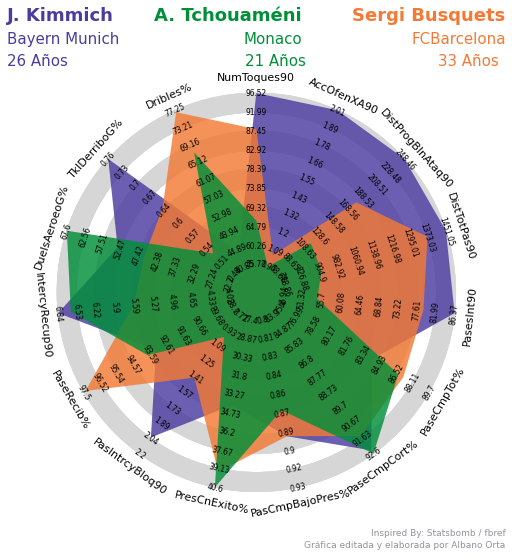

In [0]:
paramsss=['NumToques90', 'AccOfenXA90', 'DistProgBlnAtaq90', 'DistTotPas90', 'PasesInt90', 'PaseCmpTot%', 'PaseCmpCort%', 'PasCmpBajoPres%', 'PresCnExito%', 'PasIntrcyBloq90', 'PaseRecib%', 'IntercyRecup90', 'DuelsAeroeoG%', 'TklDerriboG%', 'Dribles%']

rangesss=[(55.723, 96.519),(0.97, 2.01),(68.679, 248.457),(748.857, 1451.048),(46.936, 86.369),(75.4, 89.7),(83.9, 92.6),(0.8, 0.93),(27.4, 40.6),(0.771, 2.204),(88.7, 97.5),(4.021, 6.842),(22.2, 67.6),(0.48, 0.76),(40.85, 77.25)]

### parameter value
#values = [
#    [0.11, 0.53, 0.70, 27.66, 1.05, 6.84, 84.62, 4.56, 2.22, 5.93, 8.88, 64.29],   ## for Sergino Dest
#    [0.07, 0.36, 0.16, 32.14, 1.04, 7.37, 74.46, 3.68, 2.40, 6.87, 8.97, 61.14]    ## for Nelson Semedo
#]
valuesss=[[96.519, 2.01,248.457,1451.048,86.369,84.2,92.4,0.89,34.1,2.039,93.2,6.842,53.3,0.76,44.3],
 [87.75,1.05,180.004,1372.55,79.075,87.2,91.5,0.89,39.4,1.418,97.4,5.589,45.9,0.64,76.8],
 [66.186,0.97,116.52,916.271,54.692,86.7,92.6,0.87,40.6,1.003,93.7,6.634,67.6,0.53,67.3]]

## title
title = dict(
    title_name='J. Kimmich',
    title_color='#4c3b9f',
    subtitle_name='Bayern Munich',
    subtitle_color='#4c3b9f',
    subsubtitle_name="26 Años",
    title_name_2='Sergi Busquets',
    title_color_2='#f37a35',
    subtitle_name_2='FCBarcelona',
    subtitle_color_2='#f37a35',
    subsubtitle_name_2="33 Años",
    title_name_3='A. Tchouaméni',
    title_color_3='#008F39',
    subtitle_name_3='Monaco',
    subtitle_color_3='#008F39',
    subsubtitle_name_3="21 Años",
    title_fontsize=18,
    subtitle_fontsize=14,
)
 
## endnote 
endnote = "Gráfica editada y elaborada por Albano Orta"
 
## instantiate object 
radar = Radar(label_fontsize=11, range_fontsize=7.5)
 
## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=rangesss, params=paramsss, values=valuesss, 
                                 radar_color=['#4c3b9f', '#f37a35', '#008F39'], 
                                 alphas=[0.82, 0.82, 0.82], title=title, endnote=endnote,
                                 compare=True)